# How to 異常検知

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### データのロード(Wine dataset)
https://ir.library.oregonstate.edu/concern/datasets/47429f155

In [2]:
df = pd.read_csv('wine_benchmark_0001.csv')
df.head()

,point.id,motherset,origin,original.label,diff.score,ground.truth,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,wine_point_3594,wine,regression,7,0.050492,nominal,-1.245962,-0.362411,-0.265853,-0.261304,-0.343495,1.209882,0.747594,-0.899276,0.817846,-0.613338,0.174560
1,wine_point_5089,wine,regression,5,0.082237,anomaly,0.759540,0.973867,0.215849,-0.534540,0.598458,-0.536656,0.199134,0.968217,0.071518,0.596292,-0.915394
2,wine_point_1912,wine,regression,6,0.290201,nominal,-0.088942,-0.969809,-0.403482,-0.870829,-0.429127,-0.592996,-0.791633,-0.699187,-1.110168,1.402712,-0.496181
3,wine_point_4908,wine,regression,5,0.053559,anomaly,0.219597,0.973867,0.284664,0.138039,0.427194,-0.762016,-0.243173,1.034913,0.817846,1.805921,0.006874
4,wine_point_2246,wine,regression,7,0.420300,nominal,0.219597,-0.180191,-0.541112,0.348220,-0.714567,-0.142276,0.446826,-0.242318,-0.363840,-1.016548,0.090717


In [3]:
df.describe()

,original.label,diff.score,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000,3703.000000
mean,5.833648,0.182961,-0.015088,-0.002474,0.004425,-0.003911,-0.011658,0.005770,0.006552,-0.017944,-0.008731,0.006213,0.009173
std,0.878879,0.179670,0.979572,1.015064,0.998171,0.988028,0.974637,1.027255,1.001732,0.986455,0.990001,0.978650,1.005466
min,3.000000,0.002303,-2.557251,-1.577208,-2.192664,-1.017956,-1.342536,-1.663455,-1.941631,-2.529997,-3.100376,-2.091774,-2.089189
25%,5.000000,0.060985,-0.628884,-0.666110,-0.472297,-0.765739,-0.514759,-0.762016,-0.667787,-0.832580,-0.674810,-0.680540,-0.831551
50%,6.000000,0.126008,-0.243211,-0.301671,-0.059409,-0.524031,-0.257863,-0.085936,0.057596,0.034471,-0.115064,-0.142926,-0.160811
75%,6.000000,0.237099,0.373866,0.366468,0.491108,0.537383,0.227386,0.590143,0.712210,0.741450,0.631264,0.461889,0.677615
max,9.000000,0.983355,6.698910,7.533774,9.230570,5.497655,15.840967,14.562446,5.736815,5.203424,4.238516,9.534111,3.695947


In [4]:
df_nominal = df[df['ground.truth']=='nominal'].drop(['point.id','motherset','origin','original.label',
                                                     'ground.truth'],axis=1)
df_nominal.describe()

,diff.score,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000
mean,0.138589,-0.061119,-0.215317,0.069390,-0.027071,-0.146193,0.036268,-0.034290,-0.219793,-0.003435,0.034794,0.296002
std,0.148588,0.977973,0.843820,0.911991,0.962808,0.807848,0.938349,0.939918,1.012293,0.979659,1.006973,1.028169
min,0.002303,-2.557251,-1.577208,-2.192664,-0.996938,-1.199816,-1.663455,-1.941631,-2.529997,-3.100376,-2.091774,-1.669977
25%,0.041708,-0.628884,-0.787590,-0.334668,-0.765739,-0.571847,-0.649336,-0.597018,-1.049342,-0.674810,-0.680540,-0.580023
50%,0.088777,-0.243211,-0.423150,0.009405,-0.513522,-0.343495,-0.029596,0.022211,-0.299010,-0.052870,-0.142926,0.258402
75%,0.170649,0.296732,0.123508,0.491108,0.495347,-0.000967,0.590143,0.606056,0.594718,0.631264,0.529090,1.096828
max,0.950183,6.004698,4.132341,9.230570,5.497655,10.217794,4.590278,3.153743,5.203424,4.238516,9.534111,3.109049


In [5]:
df_anomaly = df[df['ground.truth']=='anomaly'].drop(['point.id','motherset','origin','original.label',
                                                     'ground.truth'],axis=1)
df_anomaly.describe()

,diff.score,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,0.261760,0.066658,0.375506,-0.110943,0.037219,0.227257,-0.048391,0.079081,0.340512,-0.018137,-0.044542,-0.500195
std,0.201784,0.977440,1.171804,1.126369,1.030383,1.178760,1.167002,1.099637,0.825277,1.008407,0.924414,0.723767
min,0.009400,-2.325847,-1.394989,-2.192664,-1.017956,-1.342536,-1.550775,-1.923939,-2.433288,-2.665018,-1.688564,-2.089189
25%,0.122991,-0.551750,-0.483890,-0.747556,-0.765739,-0.372039,-0.931035,-0.791633,-0.265662,-0.674810,-0.613338,-0.999236
50%,0.196900,-0.088942,0.002029,-0.128224,-0.534540,-0.115143,-0.254956,0.199134,0.434648,-0.115064,-0.210128,-0.705787
75%,0.339984,0.451001,1.095347,0.559923,0.663492,0.598458,0.646483,0.920094,0.934869,0.569070,0.327485,-0.076968
max,0.983355,6.698910,7.533774,4.688803,3.795189,15.840967,14.562446,5.736815,2.819036,4.238516,7.316457,3.695947


### (1)正常時の分布とシャノン情報量

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nominal')

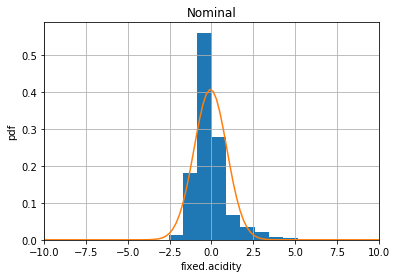

In [6]:
df_nominal['fixed.acidity'].hist(normed=True)
mu, sigma = stats.norm.fit(data=df_nominal['fixed.acidity'])
x = np.linspace(-10, 10, 100)
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma))
plt.xlabel('fixed.acidity')
plt.ylabel('pdf')
plt.xlim([-10, 10])
plt.title('Nominal')

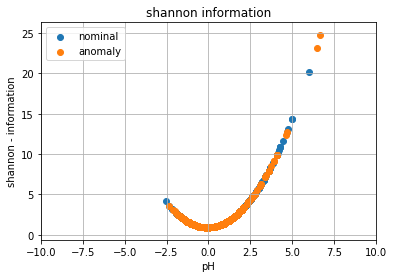

In [7]:
alpha_nominal = -np.log(stats.norm.pdf(df_nominal['fixed.acidity'], loc=mu, scale=sigma))
alpha_anomaly = -np.log(stats.norm.pdf(df_anomaly['fixed.acidity'], loc=mu, scale=sigma))
plt.scatter(df_nominal['fixed.acidity'], alpha_nominal, label='nominal')
plt.scatter(df_anomaly['fixed.acidity'], alpha_anomaly, label='anomaly')
plt.grid()
plt.xlim([-10, 10])
plt.xlabel('pH')
plt.ylabel('shannon - information')
plt.title('shannon information')
plt.legend()

In [8]:
a_th = []
r_0 = []
r_1 = []

for a_th_i in range(0,10):
    a_th.append(a_th_i)
    r_0.append(sum(alpha_nominal < a_th_i) / float(alpha_nominal.shape[0]))
    r_1.append(sum(alpha_anomaly > a_th_i) / float(alpha_anomaly.shape[0]))

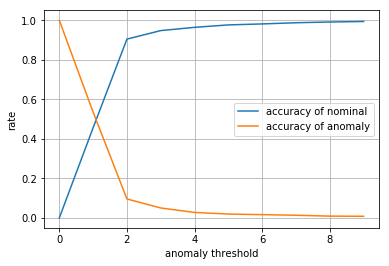

In [9]:
plt.plot(a_th, r_0, label='accuracy of nominal')
plt.plot(a_th, r_1, label='accuracy of anomaly')
plt.grid()
plt.xlabel('anomaly threshold')
plt.ylabel('rate')
plt.legend()

Text(0,0.5,'accuracy of anomaly')

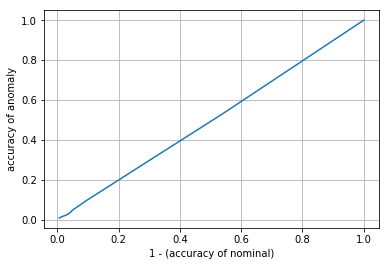

In [10]:
plt.plot(1 - np.array(r_0), np.array(r_1))
plt.grid()
plt.xlabel('1 - (accuracy of nominal)')
plt.ylabel('accuracy of anomaly')

### (2)マハラノビス距離

In [11]:
alpha = pow((df_anomaly['fixed.acidity'] - df_nominal['fixed.acidity'].mean()) / 
            df_nominal['fixed.acidity'].std(), 2)

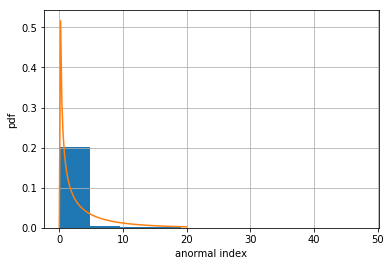

In [12]:
plt.hist(alpha,normed=True)
k, mu, sigma = stats.chi2.fit(data=alpha)
x = np.linspace(0, 20, 100)
plt.plot(x, stats.chi2.pdf(x, df=k, loc=mu, scale=sigma))
plt.xlabel('anormal index')
plt.ylabel('pdf')
plt.grid()

In [13]:
C = np.cov(df_nominal.values.transpose(), bias=True)
invC = np.linalg.inv(C)
print(C[0][0])
print(df_nominal['diff.score'].var())

0.022069218211682312
0.022078537982886576


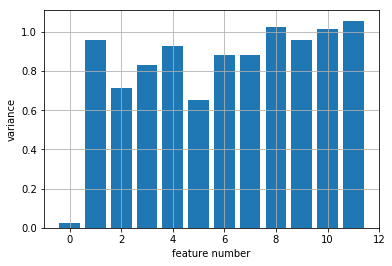

In [14]:
plt.bar(range(C.shape[0]),C.diagonal())
plt.xlabel('feature number')
plt.ylabel('variance')
plt.grid()

In [15]:
X = np.array([(df_anomaly.iloc[0] - df_nominal.mean()).values])
alpha = (X.dot(invC)).dot(X.T)
alpha

array([[11.90901886]])

In [16]:
A = np.array((df_anomaly - df_nominal.mean()).values)

In [17]:
A.shape

(1334, 12)

In [18]:
(A.dot(invC)).shape

(1334, 12)

In [19]:
invC.shape

(12, 12)

In [20]:
A.T.shape

(12, 1334)

In [21]:
alpha_all_arr = (A.dot(invC)).dot(A.T)

In [22]:
alpha_all_arr[0][0]

11.909018860265935

Text(0,0.5,'pdf')

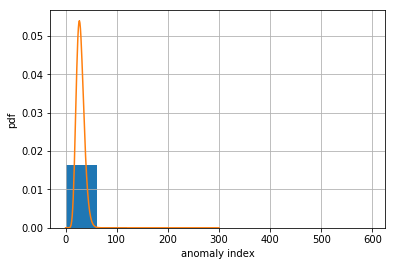

In [23]:
alpha_all = alpha_all_arr.diagonal()
plt.hist(alpha_all,normed=True)
x = np.linspace(0,300,300)
plt.plot(x, stats.chi2.pdf(x, df=29, scale=1))
plt.grid()
plt.xlabel('anomaly index')
plt.ylabel('pdf')

In [24]:
X

array([[-0.05635188,  0.82065892,  1.18918382,  0.14645991, -0.5074687 ,
         0.74465084, -0.57292409,  0.23342372,  1.18801037,  0.0749531 ,
         0.56149828, -1.21139574]])

In [25]:
A[0]

array([-0.05635188,  0.82065892,  1.18918382,  0.14645991, -0.5074687 ,
        0.74465084, -0.57292409,  0.23342372,  1.18801037,  0.0749531 ,
        0.56149828, -1.21139574])

In [26]:
indx_max = alpha_all > 100
alpha_all[indx_max], alpha_all.max()

(array([224.99320273, 136.73312543, 595.11029058, 272.82386973,
        325.05607114, 243.52258688, 364.18224515, 105.97637297,
        254.19044193, 193.42900768, 173.39908326]), 595.1102905821283)

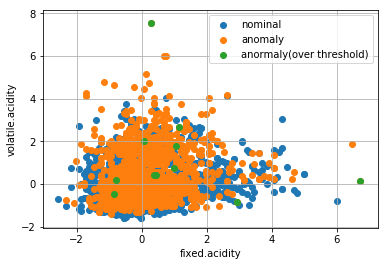

In [27]:
i='fixed.acidity'
j='volatile.acidity'
plt.scatter(df_nominal[i],df_nominal[j], label='nominal')
plt.scatter(df_anomaly[i],df_anomaly[j], label='anomaly')
plt.scatter(df_anomaly[i][indx_max],df_anomaly[j][indx_max], label='anormaly(over threshold)')
plt.grid()
plt.xlabel(i)
plt.ylabel(j)
plt.legend()

In [28]:
# sns.pairplot(df)

In [29]:
def mahalanobis_distance(df_norminal, df_anomaly):
    C = np.cov(df_nominal.values.transpose(), bias=True)
    invC = np.linalg.inv(C)
    A = np.array((df_nominal - df_nominal.mean()).values)
    alpha_nominal = (A.dot(invC)).dot(A.T).diagonal()
    A = np.array((df_anomaly - df_nominal.mean()).values)
    alpha_anomaly = (A.dot(invC)).dot(A.T).diagonal()
    
    return alpha_nominal, alpha_anomaly

In [30]:
alpha_nominal, alpha_anomaly = mahalanobis_distance(df_nominal, df_anomaly)

In [31]:
a_th = []
r_0 = []
r_1 = []

for a_th_i in range(0,100):
    a_th.append(a_th_i)
    r_0.append(sum(alpha_nominal < a_th_i) / float(alpha_nominal.shape[0]))
    r_1.append(sum(alpha_anomaly > a_th_i) / float(alpha_anomaly.shape[0]))

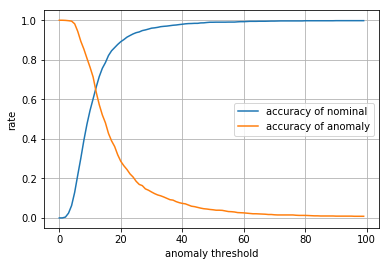

In [32]:
plt.plot(a_th, r_0, label='accuracy of nominal')
plt.plot(a_th, r_1, label='accuracy of anomaly')
plt.grid()
plt.xlabel('anomaly threshold')
plt.ylabel('rate')
plt.legend()

Text(0,0.5,'accuracy of anomaly')

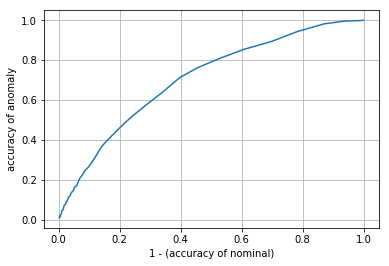

In [33]:
plt.plot(1 - np.array(r_0), np.array(r_1))
plt.grid()
plt.xlabel('1 - (accuracy of nominal)')
plt.ylabel('accuracy of anomaly')

In [34]:
sum(alpha_anomaly > 12) / float(alpha_anomaly.shape[0])

0.636431784107946

In [35]:
sum(alpha_nominal < 12) / float(alpha_nominal.shape[0])

0.6614605318699873

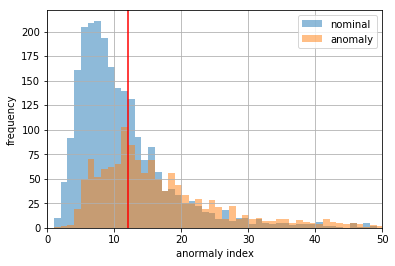

In [36]:
bins = np.linspace(0,250,250)
plt.hist(alpha_nominal, alpha=0.5, bins=bins, label='nominal')
plt.hist(alpha_anomaly, alpha=0.5, bins=bins, label='anomaly')
plt.axvline(x=12, color='r')
plt.xlim([0,50])
plt.xlabel('anormaly index')
plt.ylabel('frequency')
plt.legend()
plt.grid()

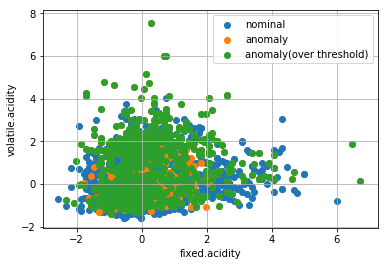

In [37]:
a_th = 12
indx_max = alpha_anomaly > a_th
i='fixed.acidity'
j='volatile.acidity'
plt.scatter(df_nominal[i],df_nominal[j], label='nominal')
plt.scatter(df_anomaly[i],df_anomaly[j], label='anomaly')
plt.scatter(df_anomaly[i][indx_max],df_anomaly[j][indx_max], label='anomaly(over threshold)')
plt.xlabel(i)
plt.ylabel(j)
plt.legend()
plt.grid()

### One-Class SVM

In [38]:
from sklearn import svm

In [39]:
clf = svm.OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
clf.fit(df_nominal[[i,j]])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

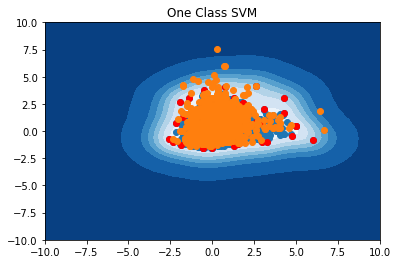

In [40]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("One Class SVM")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.scatter(df_nominal[i],df_nominal[j])
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], color='r')
plt.scatter(df_anomaly[i],df_anomaly[j])

In [41]:
clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
clf.fit(df_nominal)
(clf.predict(df_nominal)==-1).sum() / float(df_nominal.shape[0])

0.09919797382861967